In [1]:
import torch
import gym
import numpy as np
env = gym.make("FrozenLake-v1")

In [2]:
gamma = 0.99
threshold = 0.0001

In [3]:
def run_episode (env, policy):
    state = env.reset()
    total_reward = 0
    is_done = False
    while not is_done:
        action = policy[state].item()
        state, reward, is_done, info = env.step(action)
        total_reward += reward
        if is_done:
            break
    return total_reward

In [4]:
def value_iteration (env, gamma, threshold):
    n_state = env.observation_space.n
    n_action = env.action_space.n
    V = torch.zeros(n_state)
   
    while True:
        V_temp = torch.empty(n_state)
        
        for state in range (n_state):
            v_actions = torch.zeros(n_action)
            
            for action in range (n_action):
                
                for trans_prob, new_state, reward, _ in env.env.P[state][action]:
                    v_actions[action] += trans_prob*(reward + gamma*V[new_state])
            
            V_temp[state] = torch.max(v_actions)    
        max_delta = torch.max(torch.abs(V-V_temp))
        V = V_temp.clone()

        #V_his.append(V)
        
        if max_delta <= threshold:
            break
    
    return V

In [5]:
V_optimal = value_iteration(env,gamma,threshold)

In [20]:
print ('Optimal values:\n',V_optimal)

Optimal values:
 tensor([0.5404, 0.4966, 0.4681, 0.4541, 0.5569, 0.0000, 0.3572, 0.0000, 0.5905,
        0.6421, 0.6144, 0.0000, 0.0000, 0.7410, 0.8625, 0.0000])


In [7]:
def extract_optimal_policy (env, V_optimal, gamma):
    n_state = env.observation_space.n
    n_action = env.action_space.n
    optimal_policy = torch.zeros(n_state)
       
    for state in range (n_state):
        v_actions = torch.zeros(n_action)
        
        for action in range (n_action):
            
            for trans_prob, new_state, reward, _ in env.env.P[state][action]:
                v_actions[action] += trans_prob*(reward + gamma*V_optimal[new_state])
                
        optimal_policy[state] = torch.argmax(v_actions)
    return optimal_policy

In [15]:
optimal_policy = extract_optimal_policy(env,V_optimal,gamma)

In [21]:
print ('Optimal policy:\n',optimal_policy)

Optimal policy:
 tensor([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])


In [17]:
n_episode = 1000
total_rewards=[]
for episode in range(n_episode):
    total_reward = run_episode(env, optimal_policy)
    total_rewards.append(total_reward)

In [22]:
print ('Average reward for optimal policy:\n',sum(total_rewards)/n_episode)

Average reward for optimal policy:
 0.742


In [23]:
gammas = [0, 0.2, 0.4, 0.6, 0.8, 0.99, 1]

In [24]:
avg_reward_gamma = []
for gamma in gammas:
    V_optimal = value_iteration (env, gamma, threshold)
    optimal_policy = extract_optimal_policy (env, V_optimal, gamma)
    total_rewards = []
    
    for episode in range (n_episode):
        total_reward = run_episode (env, optimal_policy)
        total_rewards.append (total_reward)
    avg_reward_gamma.append (sum(total_rewards) / n_episode)

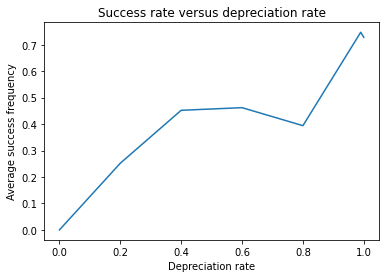

In [26]:
import matplotlib.pyplot as plt
plt.plot (gammas, avg_reward_gamma)
plt.title ('Success rate versus depreciation rate')
plt.xlabel ('Depreciation rate')
plt.ylabel ('Average success frequency')
plt.show()